# Working with Text in Python - Regex with Pandas
This notebook contains a summary and examples of the corresponding chapter of the course "Applied Text Mining with Python".
Link to the course overview: https://www.coursera.org/learn/python-text-mining
Link to the chapter video: https://www.coursera.org/lecture/python-text-mining/demonstration-regex-with-pandas-and-named-groups-wh4nJ
Working through the examples assume that the reader is familiar with the following topics:

- Handling Text in Python
- Regular expressions

We'll explore a few regexp methods to filter and group text and aggregate text fragments, thus preparing text for further processing.

## Text corpus used: MASC Sentence Corpus
For having example text data, we use the MASC Sentence Corpus development-n.txt; it is contained in the package masc_wordsense.zip, downloadable from http://www.anc.org/data/masc/downloads/data-download/. This vast collection contains corpora with sentences around a certain topic. The example corpus used here is 'development-n.txt' from directory 'data\Full_set\round2.2\'.

## Preparation: import package nltk, tokenize into words
We use the nltk ([natural language toolkit](https://www.nltk.org/index.html)) package to split the text corpus into sentences. For this, we need a tokenizer (a set of rules enabling nltk to split a text corpus into sentences). english.pickle allows us to do that properly; it will e.g. not split sentences at non-delimiter points such as in "Dr. Jekyll".
The 'punkt' tokenizer package only needs to be downloaded to the short-term memory accessed by the notebook once per coding session (as descibed in comment in following code cell).

In [25]:
import nltk
#nltk.download('punkt') #un-comment on first execution of cell

my_file = 'development-n.txt'

f = open(my_file, encoding='utf-8')
raw = f.read()
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
sentences_tokenized = sent_detector.tokenize(raw.strip())

print ("Let's have a look at the sample sentences: ")
print ("sentences_tokenized = ")
print (sentences_tokenized[0:4])

Let's have a look at the sample sentences: 
sentences_tokenized = 
['The Wal-Mart strategy required and fostered the development of a company-wide computer system to track incoming and outgoing shipments to the various stores.', 'In Angela and Tom’s case, sandwiching concentrated time with Victor and Jeannine between work and other obligations, which often took precedence over family rituals, meant that routines that signal parental caring and that are major sources of development went by the wayside.', 'The new approaches are numerous—some more concerned with motor skills, others with cognitive competencies, and still others with emotional and social development.', 'How can adults build interdependent relationships with children that foster the development of culturally meaningful skills and mature, autonomous behavior?']


## Working with text
Let's begin working with the text. We need to import the pandas package, it contains several useful methods for transforming data (e.g. lists to dataframes). We'll transform the list of sentences to a dataframe, because it allows us to treat data like in a spreadsheet.
At first, we'll dump all sentences in a column named 'text'.

In [26]:
import pandas as pd

df = pd.DataFrame(sentences_tokenized, columns=['text'])

print ("First 10 rows of the created table:")
df[0:10]

First 10 rows of the created table:


,text
0,The Wal-Mart strategy required and fostered th...
1,"In Angela and Tom’s case, sandwiching concentr..."
2,The new approaches are numerous—some more conc...
3,How can adults build interdependent relationsh...
4,the zone of proximal development\nIs learning ...
5,"It was in his book, With His Pistol in His Han..."
6,"Both these developments, in turn, placed a pre..."
7,The web pages were developed using JavaServer ...
8,Rate of development\nAs is the case in wing ce...
9,Diapausing embryos of the orthopteran Austroic...


### Quantitative insights and statistics
It is helpful to approach text analysis top-down, at first having a look on some statistics regarding the sentences: string/word count length of each sentence, and median string/word count length of all sentences. This may enable us to spot whether there have been errors in splitting the corpus into sentences.

In [27]:
print ("String length per sentence: ")
df['text'].str.len()[0:10]

String length per sentence: 


0    157
1    276
2    162
3    156
4    132
5    274
6    181
7    300
8    265
9    163
Name: text, dtype: int64

In [28]:
print ("Word count per sentence: ")
df['text'].str.split().str.len()[0:10]

Word count per sentence: 


0    23
1    42
2    22
3    20
4    21
5    49
6    30
7    39
8    45
9    26
Name: text, dtype: int64

A bar plot allows us to see word count of all treated sentences at one glance:

<BarContainer object of 4151 artists>

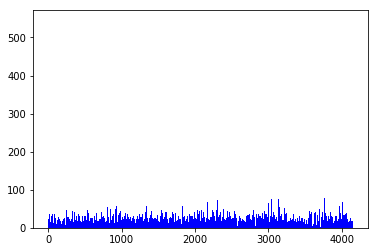

In [29]:
word_count_df = df['text'].str.split().str.len()

import matplotlib.pyplot as plt
plt.figure()
xvals = range(len(word_count_df))
plt.bar(xvals, word_count_df, width = 1, color='blue')

We can see several outliers with very long sentences (~100 words), but on average, the word count per sentences seems to be in a natural range.

Defining a mask allows to take a look at the outliers. A mask is another dataframe, marking as 'True' those entries where the defined condition applies (otherwise, as 'False'). With the 'loc' function of dataframes, we can assign the entries in df that have been masked as 'True' to a new dataframe.

In [30]:
mask_large_sentences = (df['text'].str.split().str.len() >= 80)
print ("mask_large_sentences (first 20 entries): \n", mask_large_sentences[0:20])
df_large_sentences = df.loc[mask_large_sentences]
print(df_large_sentences)

mask_large_sentences (first 20 entries): 
 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: text, dtype: bool
                                                   text
142   Vygotsky deﬁned the zone of proximal developme...
959   Blots were first incubated overnight with gent...
1116  In this meta-analysis, we estimated incidence ...
1459  The literature surrounding norepinephrine and ...
1461  The literature surrounding norepinephrine and ...
1780  In addition, the maternal GC surge effectively...
1802  With respect to the follicular and luteal deve...
2293  Justice & Community Development Center); March...
2332  Development and implementation, with substanti...
2345  These strategies include, but are not limited ...
2357  Strengthening the resource development and mar...
2360  The development

The text corpus contains references to time - so it makes sense to analyze it regarding whether the sentences contain references to daytimes. A regular expression reveals this quickly:

In [33]:
df_datestring_count = df['text'].str.findall(r'((?i)((([" ])[0-3]?\d) [A-Za-z]{0,5}((september)|(november)|(december)|(october)|(january)|(march)|(april)|(may)|(june)|(july)|(august)))|(?i)(([A-Za-z]{0,5}(september)|(november)|(december)|(october)|(january)|(march)|(april)|(may)|(june)|(july)|(august)) ([0-3]?\d(?=([, "])))))').str.len()
mask_datestring = (df_datestring_count > 0)
df_datestring_only = df.loc[mask_datestring]
print(df_datestring_only)

                                                   text
249   See Arab Human Development Report 2003 (United...
250   30, 2003); DOS cable, Nairobi 7020, "Sudan: Fo...
251   DOS cable, Nairobi 07020,"Sudan: Foreign Minis...
252   CIA cable, "19 May 98 Briefing for JSOC,"May 2...
253   Side of the Bin Ladin Capture Operation," May ...
254   183; CIA talking points, "CIA Operation Result...
754   BMP2 and 4 may act as negative growth regulato...
2028  The purpose of this report is to provide a com...
2474  IRS Systems Security and Funding: Employee Bro...
2503  Sources: The Center for Social Development, Wa...
2504  Sources: The Center for Social Development, Wa...
2534  8, 2001) and Best Practices: Better Management...
2780  To this end, on June 21, his representatives p...
2792  In this regard, agencies must continually (1) ...
2838  In response, the senior executive identified i...
4145  John L. Krauss Trustee and Chairman, Developme...


The regular expression is quite bulky. Structurally, it looks like this:

[0-3]?\d [A-Za-z]{0,5}september

But as the day-month combinations

- need to be discerned from similarly looking non-date strings
- can have more possible months
- may be turned around in their order

the used regular expression looks a lot more complex (but won't be explained here, as regular expressions justify an entire whole topic).
Extracting all matches of the very complex regex shows that the result is quite bulky:

In [48]:
df_datestring_date_all = df_datestring_only['text'].str.extract(r'((?i)((([" ])[0-3]?\d) [A-Za-z]{0,5}((september)|(november)|(december)|(october)|(january)|(march)|(april)|(may)|(june)|(july)|(august)))|(?i)(([A-Za-z]{0,5}(september)|(november)|(december)|(october)|(january)|(march)|(april)|(may)|(june)|(july)|(august)) ([0-3]?\d(?=([, "])))))')
df_datestring_date_all

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
249,July 26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,July,NaN,26,","
250,May 21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,21,","
251,May 21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,21,","
252,"""19 May","""19 May","""19","""",May,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,May 27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,27,","
254,July 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,July,NaN,7,","
754,4 may,4 may,4,,may,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028,12 April,12 April,12,,April,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2474,April 15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,April,NaN,NaN,NaN,NaN,15,","
2503,January 17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,January,NaN,NaN,NaN,NaN,NaN,NaN,17,","


Therefore, we focus on the very first (outer) match:

In [62]:
df_datestring_date_all[0]

249         July 26
250          May 21
251          May 21
252         "19 May
253          May 27
254          July 7
754           4 may
2028       12 April
2474       April 15
2503     January 17
2504     January 17
2534        July 30
2780        June 21
2792       April 15
2838       April 30
4145    December 31
Name: 0, dtype: object

For better visibility, we name those columns that contain month or day information accordingly. We do this for both order variants.

In [66]:
df_1_2 = df_datestring_date_all[0].str.extractall(r'((?P<month1>[A-Za-z]+) (?P<day1>[0-9]+))|((?P<day2>[0-9]+) (?P<month2>[A-Za-z]+))')
df_1_2

,,0,month1,day1,3,day2,month2
,match,,,,,,
249,0,July 26,July,26,NaN,NaN,NaN
250,0,May 21,May,21,NaN,NaN,NaN
251,0,May 21,May,21,NaN,NaN,NaN
252,0,NaN,NaN,NaN,19 May,19,May
253,0,May 27,May,27,NaN,NaN,NaN
254,0,July 7,July,7,NaN,NaN,NaN
754,0,NaN,NaN,NaN,4 may,4,may
2028,0,NaN,NaN,NaN,12 April,12,April
2474,0,April 15,April,15,NaN,NaN,NaN


Now we concatenate the month and day columns and replace the 'nan' strings stemming from empty regex results. We then keep only the 'month' and 'day' columns in the new dataframe:

In [89]:
df_1_2['month'] = df_1_2['month1'].map(str) + df_1_2['month2'].map(str)
df_1_2['month'] = df_1_2['month'].str.replace('nan', '', regex=True)
df_1_2['day'] = df_1_2['day1'].map(str) + df_1_2['day2'].map(str)
df_1_2['day'] = df_1_2['day'].str.replace('nan', '', regex=True)
df_date = df_1_2[['month','day']]
df_date

,,month,day
,match,,
249,0,July,26
250,0,May,21
251,0,May,21
252,0,May,19
253,0,May,27
254,0,July,7
754,0,may,4
2028,0,April,12
2474,0,April,15


### Summary: from raw text to a table extract
We took raw text, tokenized it into sentences, searched it for formats that resemble what we would expect for dates with month and day and created a structured table from that - all automatized.

The table extract we created contains
- reference to relevant elements and 
- key information in separate, structured columns

This is only a brief introduction what can be done by combining dataframes, text mining and regular expressions. The possibilities of these and more methods are vast. Exploring them can lead to interesting applications:

- analysis of syntax and constituent to discover dependencies between subjects and objects in texts
- evaluation of trends and opinion from large amounts of text
- information consolidation

and so much more.